<a href="https://colab.research.google.com/github/FaizalLeviansyah/Machine_Learning-2023/blob/main/Week_12_ML_Faizal_Lab_Work_Module12_OpticalCharacterRecognition(OCR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Work 1
**OCR with Pytesseract and OpenCV**

# Description
In this laboratory exercise, we will implement OCR techniques using Tesseract and OpenCV. Pytesseract or Python-tesseract is an OCR tool for Python that also serves as a wrapper for the Tesseract OCR engine. It can read and recognize text in images and is commonly used in cases of image-to-text OCR using Python.
Additionally, it is useful as a standalone script for Tesseract, as it can read all types of images supported by the Pillow and Leptonica image libraries, including jpeg, png, gif, bmp, tiff, and others.
For more comprehensive information about the Python-tesseract approach, it can be read .
Dataset
The dataset consists of image data used in this laboratory exercise. Please ensure your connection is stable before downloading the dataset.

**Installation and Import Library**

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 10 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,209 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [4]:
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images'

# Preprocessing Images with OpenCV
In this stage, we will write basic functions for various preprocessing methods, including:

- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching

Different methods can be useful for different types of images.

In [5]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

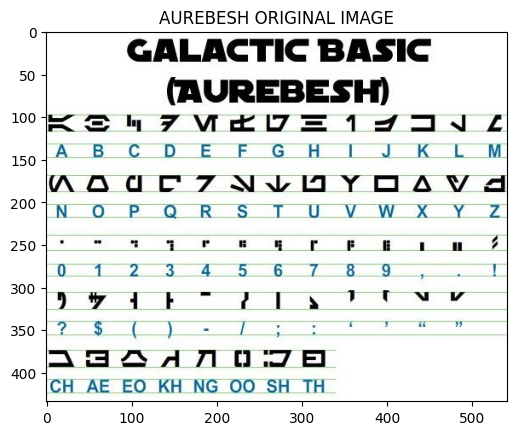

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/'

# Load the image
image = cv2.imread(IMG_DIR + 'aurebesh.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Check if the image has three channels
    if image.shape[-1] == 3:
        # Split the channels
        b, g, r = cv2.split(image)
        # Merge the channels in RGB order
        rgb_img = cv2.merge([r, g, b])
        # Display the image
        plt.imshow(rgb_img)
        plt.title('AUREBESH ORIGINAL IMAGE')
        plt.show()
    else:
        print("Error: Image does not have three channels (not an RGB image).")
else:
    print("Error: Could not read the image.")


Next, perform pre-processing, and after applying the following code for preprocessing, a new image result will be obtained.

In [ ]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

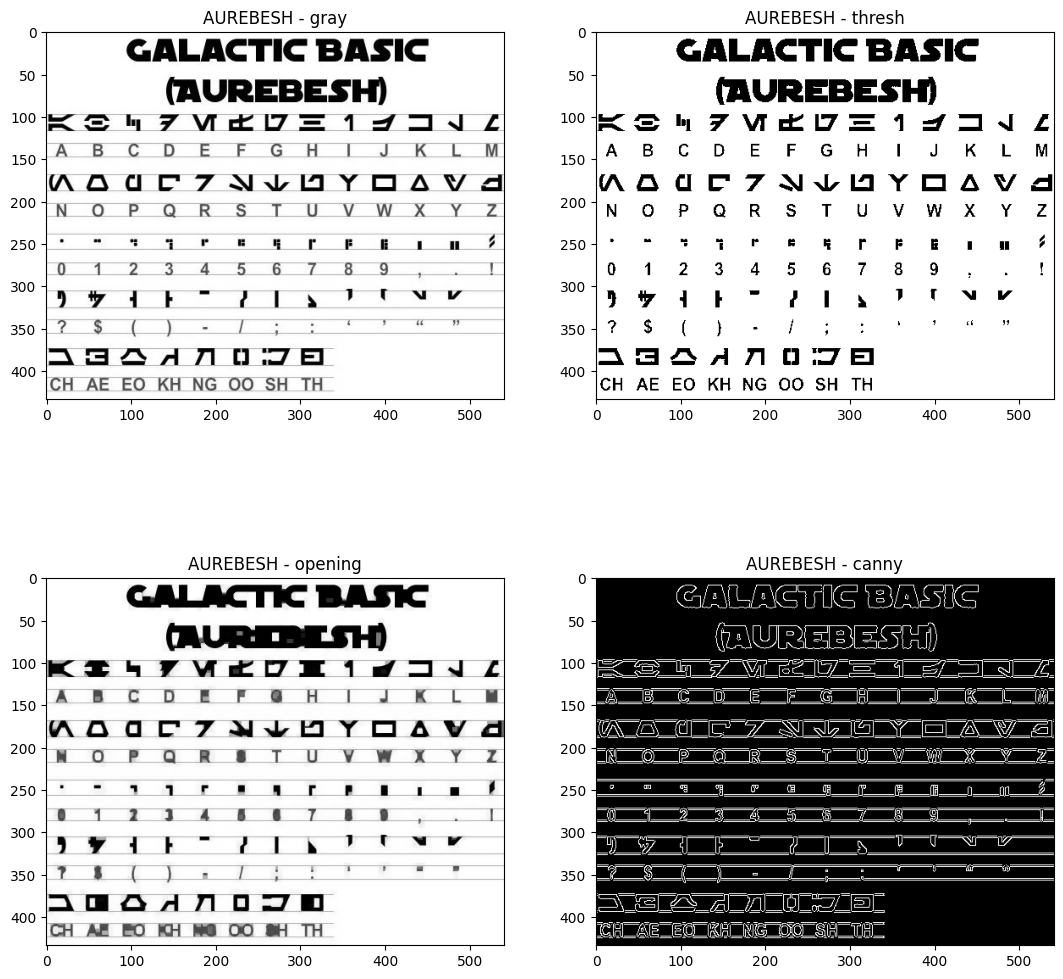

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# Next, we will extract data from those images using OCR techniques through the following code.
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['gray'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['opening'], config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(images['canny'], config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)
REehHTFVMVEVEITZIoIN EL
A 2S > EE eS A ek oe
AOder7NVYoYoAVaA
NOP RS Tn wee
‘ss 4 oe 8 g Pf fF f 4 mw 4
Sea
7 77 Ty
2S ys ee
ASaSAnNADI
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAnNnoOIH
CH AE BO KH @@ OO BH TH


------------------------

# Lab Work 2
Getting Bounding Box around Text in an Image

**Description**

When running an image through the Tesseract OCR engine, pytesseract allows users to obtain bounding box information at:
- Character level,
- Word level,
- Based on regex patterns.

This practical guide will explain how to obtain both types of information.

**Bounding Box - Character Level**

Using Pytesseract, you can obtain bounding box information for OCR results using the following code.

The script below will provide bounding box information for each character detected by Tesseract during the OCR process.

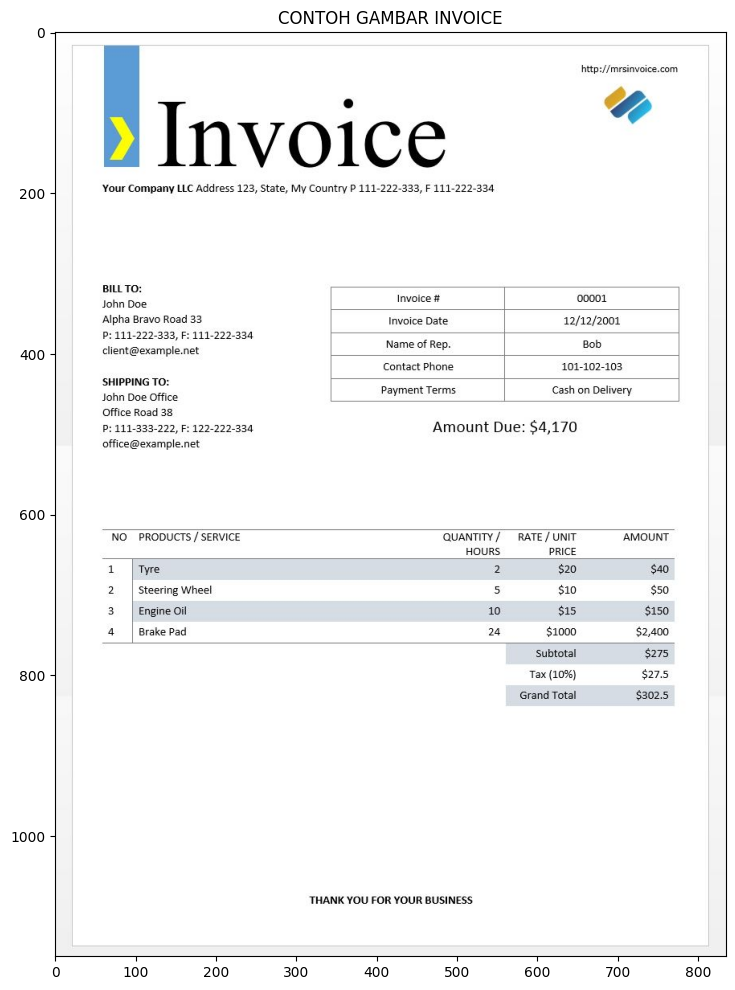

In [ ]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

The next step is to plot character boxes on the image using the pytesseract.image_to_boxes() function.

The following code will provide bounding box results on the invoice image.

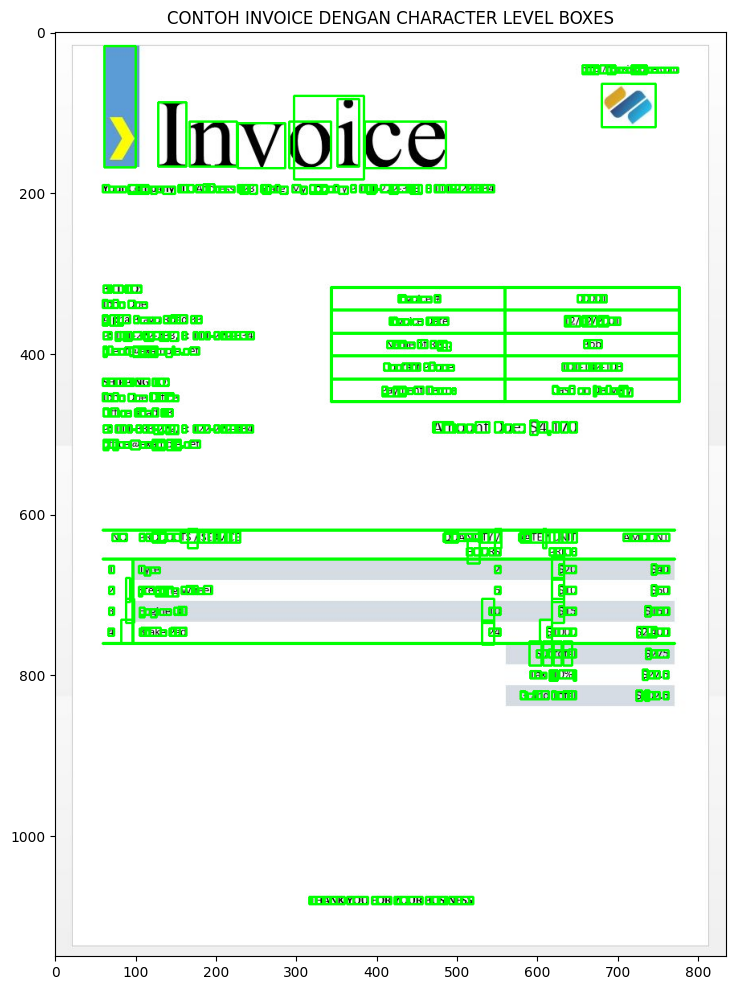

In [ ]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()

**Bounding Box - Word Level **

Next, we will use the example invoice image above to test the output results from Tesseract.

The following code will be used to read the example invoice image and then use the pytesseract.image_to_data() function to obtain text data from the image.

In [ ]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Next, in the following code, we use it to filter and only display word boxes that have a confidence level of more than 60%. As a result, the example invoice image will be displayed with boxes marking the location of each word with the qualifying confidence level.

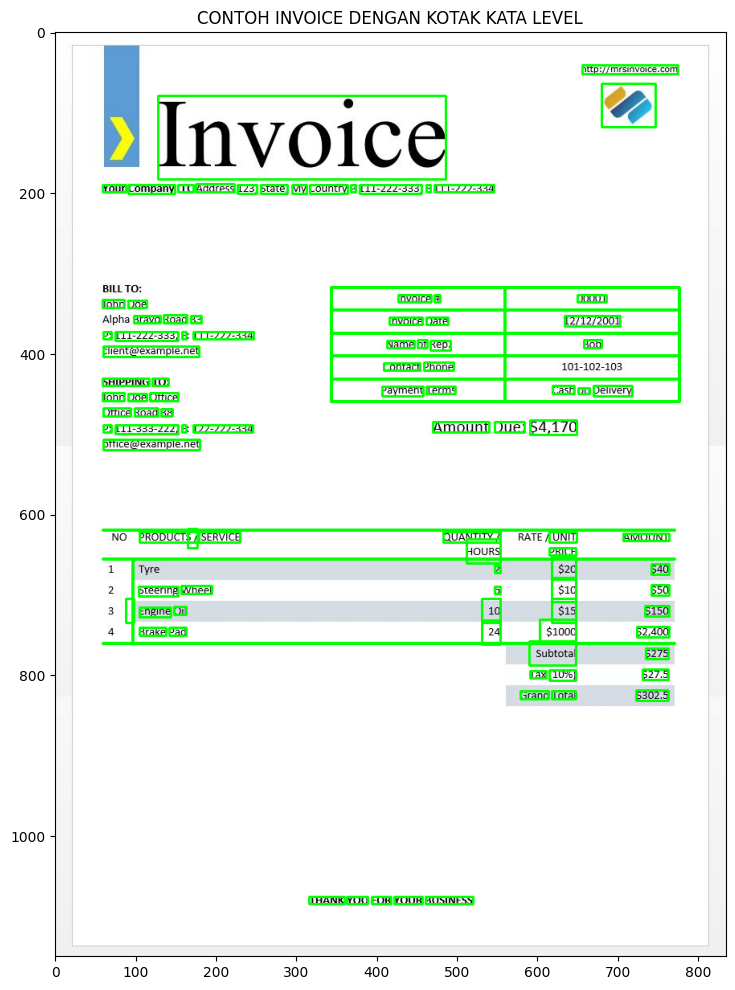

In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()

**Text Template Matching - Regex Pattern**

Suppose we want to find where a date is located in an image. Here, the template we will use is a regular expression pattern that we will match with our OCR results to find corresponding bounding boxes. We will use the regex module and the image_to_data function for this.

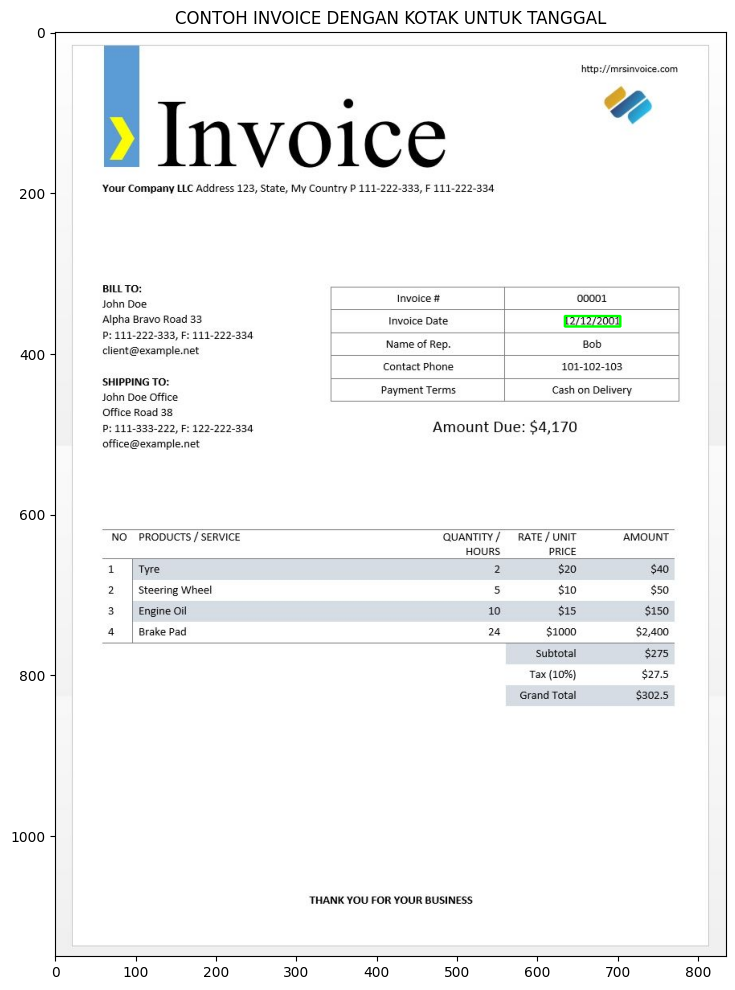

In [ ]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

**Language Detection - OCR**

You can check the available and supported languages in Tesseract in the following section.

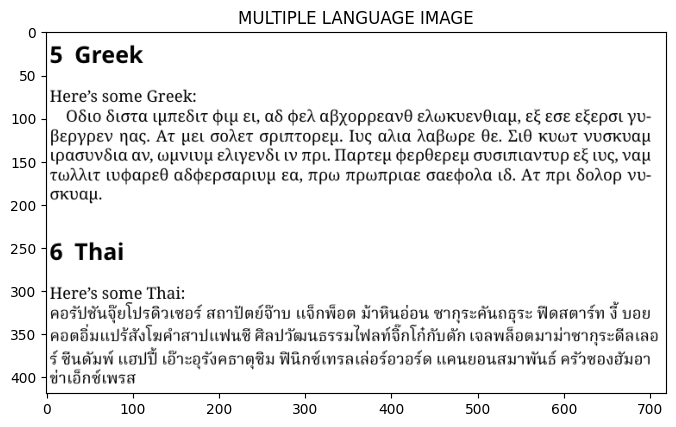

In [ ]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

Next, the following code is used to extract text from the image using Tesseract OCR. A custom configuration (custom_config) is applied by specifying only the English language (-l eng). Other parameters such as --oem 3 and --psm 6 are also used to optimize OCR results as needed.

In [ ]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))


5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



# Lab Assignment
To detect text orientation and script type
This task aims to detect the orientation of text and the type of script used in an image using Tesseract.
Task:
1. Image Preparation:
- Use the provided sample image ('hitchhikers-rotated.png').
- Display the original image using Python and OpenCV

2. Orientation and Script Detection:
- Implement a Python script to detect the text orientation in the image.
- Use Tesseract to obtain the rotation angle and script type.
- Display the results of the orientation and script type.

Image Preparation: Use the provided sample image ('hitchhikers-rotated.png'). Display the original image using Python and OpenCV. Orientation and Script Detection: Implement a Python script to detect the text orientation in the image. Use Tesseract to obtain the rotation angle and script type. Display the results of the orientation and script type

# 1.IMAGE PREPARATION
**-> ANSWER :**

In [6]:
# 1. Image Preparation
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [10]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Adjust the path to the image file
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/'

# Load the image
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rest of the code...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


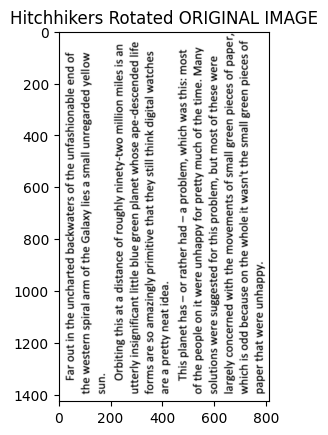

In [12]:
import cv2
import matplotlib.pyplot as plt

# Adjust the path to the image file
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/hitchhikers-rotated.png'

# Load the image
image = cv2.imread(IMG_DIR)

# Check if the image is loaded successfully
if image is not None:
    # Check if the image has three channels
    if image.shape[-1] == 3:
        # Split the channels
        b, g, r = cv2.split(image)
        # Merge the channels in RGB order
        rgb_img = cv2.merge([r, g, b])
        # Display the image
        plt.imshow(rgb_img)
        plt.title('Hitchhikers Rotated ORIGINAL IMAGE')
        plt.show()
    else:
        print("Error: Image does not have three channels (not an RGB image).")
else:
    print("Error: Could not read the image.")


# 2. Orientation and Script Detection:
**-> Answer :**

Rotation Angle: 90 degrees
Script Type: 17.90


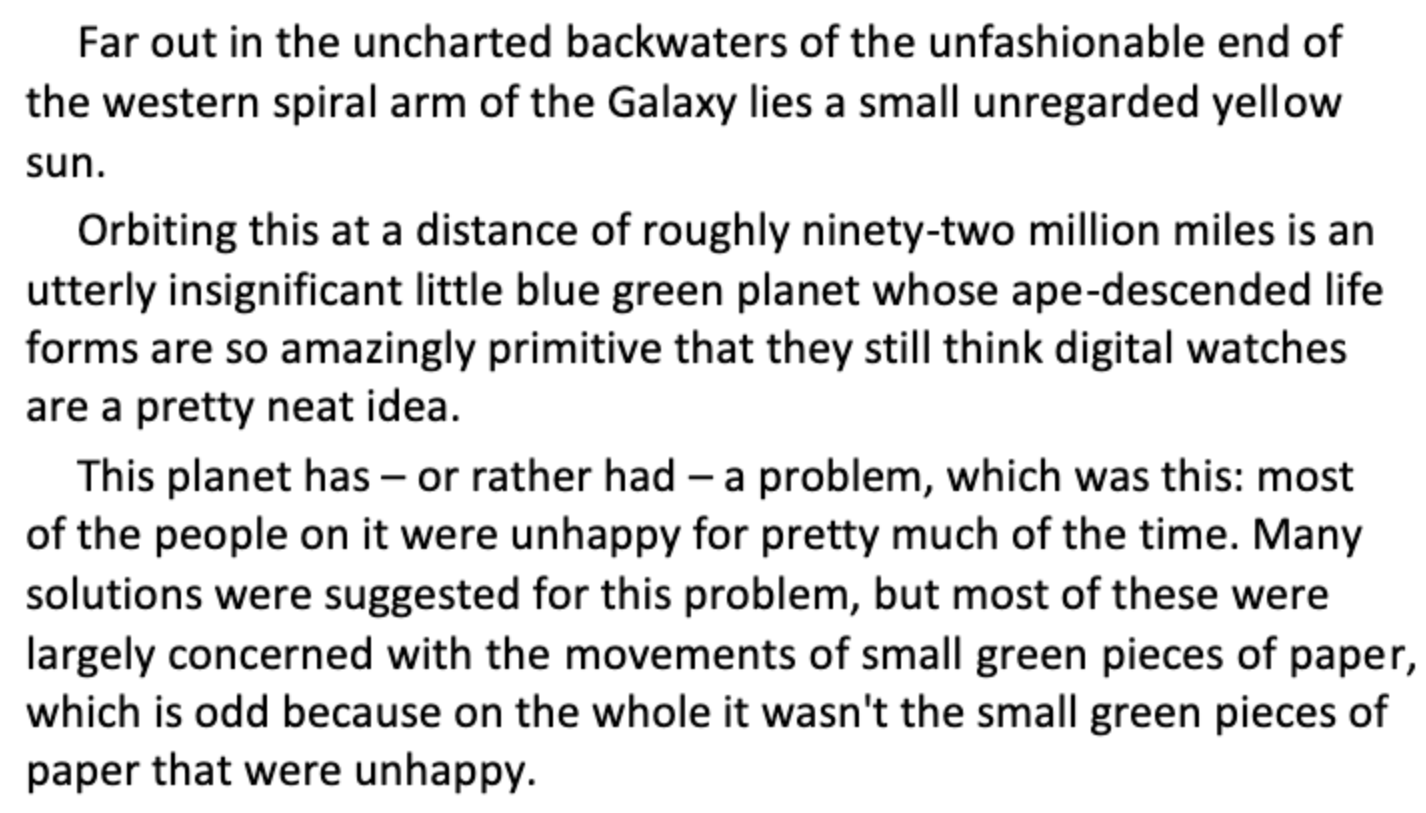

In [15]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 2: Load and preprocess the image
image_path = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/hitchhikers-rotated.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Use Tesseract OCR to detect text orientation and script type
# Specify the path to the Tesseract executable (change this according to your installation)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Use Tesseract to get the script type and orientation
text_info = pytesseract.image_to_osd(gray)

# Extract rotation angle and script type from the Tesseract output
rotation_angle = int(text_info.split('\n')[2].split(': ')[-1])
script_type = text_info.split('\n')[3].split(': ')[-1]

# Step 4: Display the results
print(f"Rotation Angle: {rotation_angle} degrees")
print(f"Script Type: {script_type}")

# Display the original image with orientation detection
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate the image for display
cv2_imshow(rotated_image)


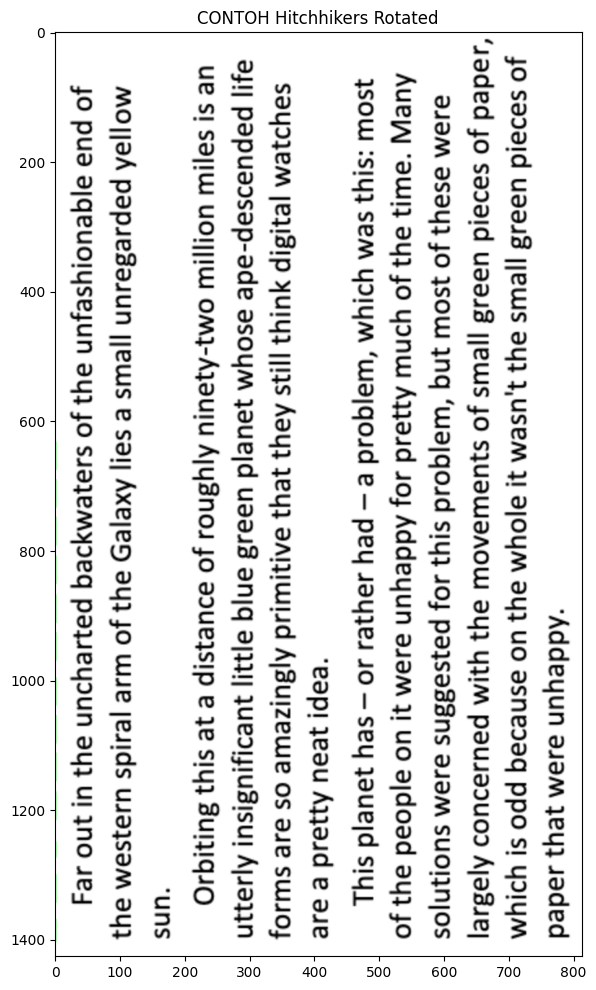

In [18]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Assuming you have defined IMG_DIR correctly
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/'

# Read the image
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Check if the image is loaded successfully
if image is not None:
    # Get the dimensions (height, width, channels) of the image
    h, w, c = image.shape

    # Use pytesseract.image_to_boxes() to get character box information
    boxes = pytesseract.image_to_boxes(image)

    # Iterate through each line of the result and draw boxes on the image using OpenCV
    for b in boxes.splitlines():
        b = b.split(' ')
        image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

    # Separate color channels to convert from BGR to RGB
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])

    # Display the image with character boxes
    plt.figure(figsize=(16, 12))
    plt.imshow(rgb_img)
    plt.title('CONTOH Hitchhikers Rotated')
    plt.show()
else:
    print("Error: Could not read the image.")